In [1]:
# Importing packages

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

The dimensions of X are (300, 2)
The first five data points in X are 
 [[ 0.00000000e+00 -0.00000000e+00]
 [ 1.01009115e-02 -4.46291090e-05]
 [ 2.01958837e-02 -4.97897171e-04]
 [ 3.00640198e-02  3.79846777e-03]
 [ 4.04008277e-02  5.09515311e-04]]
The length of y is 300
The 98th to 103th labels in y are [0 0 1 1 1]
The 198th to 203th labels in y are [1 1 2 2 2]


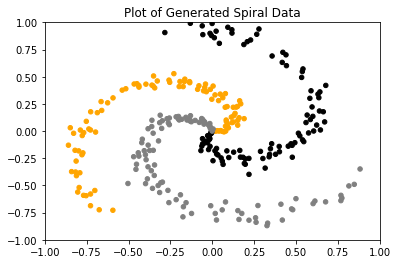

In [2]:
# Generating spiral data which will be difficult to classify with linear decision boundaries

# Number of classes
K = 3

# Number of data points per class
N = 100

# Number of features
D = 2

# Initialize data matrix
X = np.zeros((N*K, D))

# Initialize class labels vector
y = np.zeros(N*K, dtype='uint8')

# Generate sprial data with random noise
for i in range(K):
    ix = range(N*i, N*(i+1))
    radius = np.linspace(0, 1, N)
    theta = np.linspace(4*i, 4*(i+1), N) + 0.2*np.random.randn(N)
    X[ix] = np.c_[radius*np.cos(theta), radius*np.sin(theta)]
    y[ix] = i

print('The dimensions of X are %s' % (X.shape,))
print('The first five data points in X are \n %s' % X[0:5])

print('The length of y is %s' % len(y))
print('The %dth to %dth labels in y are %s' % (N-2, N+3, y[N-2:N+3]))
print ('The %dth to %dth labels in y are %s' % (2*N-2, 2*N+3, y[2*N-2:2*N+3]))

# Plot data
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', ['orange', 'black', 'grey'])
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=cmap)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title('Plot of Generated Spiral Data')
plt.show()

In [3]:
# Train Softmax linear classifier

# Total number of data points
total_data_points = X.shape[0]

# Hyperparameters
reg_strength = 1e-3
learning_rate = 1e-0
gradient_descent_loops = 2001

# Initialize Softmax weight matrix randomly and with zero initial bias
# softmax_weights is D x K [2 x 3] dimensional
# softmax_bias is 1 x K [1 x 3] dimensional
softmax_weights = 0.01*np.random.randn(D, K)
softmax_bias = np.zeros((1, K))

# Cache initial softmax_weights and softmax_bias for comparison after gradient descent optimization
initial_softmax_weights = np.copy(softmax_weights)
initial_softmax_bias = np.copy(softmax_bias)

for epoch_number in range(gradient_descent_loops):
    
    # Compute Softmax scores via matrix multiplication
    # softmax_scores is N*K x K [300 x 3] dimensional
    # Each value in a row of softmax_scores indicates likelihood that data point belongs to one of the K classes
    softmax_scores = np.dot(X, softmax_weights) + softmax_bias

    # Compute normalized Softmax probability scores
    # Each value in a row of softmax_probs represents estimated probability that data point belongs to one of K classes
    # softmax_probs is N*K x K [300 x 3] dimensional
    softmax_exp_scores = np.exp(softmax_scores)
    softmax_probs = softmax_exp_scores / np.sum(softmax_exp_scores, axis=1, keepdims=True)

    # Compute log loss of data by taking, for each data point, -log of estimated probability for correct class, then averaging
    # softmax_data_loss is a scalar, representing average value of cross-entropy loss function
    softmax_data_loss = np.mean(-np.log(softmax_probs[range(total_data_points), y]))

    # Compute total Softmax loss by also including regularization loss
    # Regularization tries to protect against overfitting and putting too much weight on a single data point
    # reg_loss represents L2 regularization
    reg_loss = 0.5*reg_strength*np.sum(softmax_weights*softmax_weights)
    softmax_loss = softmax_data_loss + reg_loss
    
    # Print Softmax loss every 200 epochs to monitor fitting
    if epoch_number % 200 == 0:
        print('Epoch number %d: loss %f' %(epoch_number, softmax_loss))
    
    # Compute dsoftmax_scores, the gradient of softmax_data_loss wrt softmax_scores
    # dsoftmax_scores given by softmax_probs - Kroneckerdelta(when column = correct class)
    # This is the general form for the gradient of the cross-entropy loss function
    # dsoftmax_scores is N*K x K [300 x 3] dimensional
    dsoftmax_scores = softmax_probs
    dsoftmax_scores[range(total_data_points), y] -= 1
    dsoftmax_scores /= total_data_points
    
    # Compute gradient of reg_loss wrt softmax_weights
    # This is the general form for the gradient of the L2 regularization loss term
    # dsoftmax_weights_reg is D x K [2 x 3] dimensional, same as softmax_weights
    dsoftmax_weights_reg = reg_strength*softmax_weights
    
    # Backpropagate dsoftmax_scores for subsequent update of softmax_weights and softmax_bias parameters
    # dsoftmax_weights is D x K [2 x 3] dimensional, same as softmax_weights
    # dsoftmax_bias is 1 x K [1 x 3] dimensional, same as softmax_bias
    dsoftmax_weights = np.dot(X.T, dsoftmax_scores) + dsoftmax_weights_reg
    dsoftmax_bias = np.sum(dsoftmax_scores, axis = 0, keepdims=True)
    
    # Update softmax_weights and softmax_bias, stepping in negative gradient direction of loss function
    softmax_weights += -learning_rate*dsoftmax_weights
    softmax_bias += -learning_rate*dsoftmax_bias

Epoch number 0: loss 1.095636
Epoch number 200: loss 0.753526
Epoch number 400: loss 0.753318
Epoch number 600: loss 0.753317
Epoch number 800: loss 0.753317
Epoch number 1000: loss 0.753317
Epoch number 1200: loss 0.753317
Epoch number 1400: loss 0.753317
Epoch number 1600: loss 0.753317
Epoch number 1800: loss 0.753317
Epoch number 2000: loss 0.753317


In [4]:
# Compare initial and optimized softmax_weights matrices and softmax_bias vectors

print('The initial softmax_weights matrix was \n %s' % initial_softmax_weights)
print('The optimized softmax_weights matrix is \n %s' % softmax_weights)

print('The initial softmax_bias vector was \n %s' % initial_softmax_bias)
print('The optimized softmax_bias vector is \n %s' % softmax_bias)

The initial softmax_weights matrix was 
 [[-0.01175093  0.00813238  0.01514418]
 [-0.0023653  -0.01202435 -0.02189282]]
The optimized softmax_weights matrix is 
 [[-2.74699127  3.12985041 -0.38130243]
 [ 1.13510195  1.2952394  -2.43524184]]
The initial softmax_bias vector was 
 [[0. 0. 0.]]
The optimized softmax_bias vector is 
 [[-0.0739926  -0.00423719  0.0782298 ]]


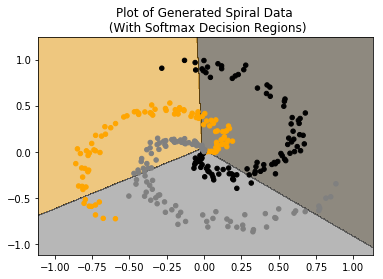

In [5]:
# Plot Softmax decision boundaries on top of data

# Create mesh_matrix for color plotting
x_min, x_max = X[:,0].min() - 0.25, X[:,0].max() + 0.25
y_min, y_max = X[:,1].min() - 0.25, X[:,1].max() + 0.25

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

mesh_matrix = np.c_[xx.ravel(), yy.ravel()]

# Compute predictions for mesh_matrix inputs
softmax_scores_mesh = np.dot(mesh_matrix, softmax_weights) + softmax_bias
softmax_prediction_regions = np.argmax(softmax_scores_mesh, axis=1).reshape(xx.shape)

# Plot data and Softmax classification regions
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', ['orange', 'black', 'grey'])
plt.contourf(xx, yy, softmax_prediction_regions, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=cmap)
plt.title('Plot of Generated Spiral Data \n (With Softmax Decision Regions)')
plt.show()

In [6]:
# Evaluate training set accuracy of Softmax linear classifier

# Compute Softmax scores via matrix multiplication
softmax_scores_trained = np.dot(X, softmax_weights) + softmax_bias

# Compute predictions by returning column with highest Softmax score for each row
softmax_predictions = np.argmax(softmax_scores_trained, axis=1)

# Compare softmax_predictions to true labels contained in y
print('Training accuracy: %.2f' % np.mean(softmax_predictions == y))

Training accuracy: 0.53


In [7]:
# Train Two Layer Neural Network

# Number of classes
K = 3

# Number of data points per class
N = 100

# Number of features
D = 2

# Total number of data points
total_data_points = X.shape[0]

# Hyperparameters
reg_strength = 1e-3
learning_rate = 1e-0
gradient_descent_loops = 2001
hidden_layer_size = 100

# Initialize first neural net weight matrix randomly and with zero initial bias
# nn_weights is D x hidden_layer_size [2 x 100] dimensional
# nn_bias is 1 x hidden_layer_size [1 x 100] dimensional
nn_weights = 0.01*np.random.randn(D, hidden_layer_size)
nn_bias = np.zeros((1, hidden_layer_size))

# Cache initial nn_weights and nn_bias for comparison after gradient descent optimization
initial_nn_weights = np.copy(nn_weights)
initial_nn_bias = np.copy(nn_bias)

# Initialize hidden layer weight matrix randomly and with zero initial bias
# hidden_layer_weights is hidden_layer_size x K [100 x 3] dimensional
# hidden_layer_bias is 1 x K [1 x 3] dimensional
hidden_layer_weights = 0.01*np.random.randn(hidden_layer_size, K)
hidden_layer_bias = np.zeros((1, K))

# Cache initial hidden_layer_weights and hidden_layer_bias for comparison after gradient descent optimization
initial_hidden_layer_weights = np.copy(hidden_layer_weights)
initial_hidden_layer_bias = np.copy(hidden_layer_bias)

for epoch_number in range(gradient_descent_loops):
    
    # Compute hidden layer activations
    # Using Rectified Linear Unit (ReLU) activation function, which allows for nonlinear decision boundaries
    # hidden_layer_input is N*K x hidden_layer_size [300 x 100] dimensional
    hidden_layer_input = np.maximum(0, np.dot(X, nn_weights) + nn_bias)
    
    # Compute neural network scores using hidden layer activations and hidden layer weights
    # nn_scores is N*K x K [300 x 3] dimensional
    nn_scores = np.dot(hidden_layer_input, hidden_layer_weights) + hidden_layer_bias
    
    # Compute neural network class probabilities by exponentiating and normalizing, as with Softmax
    # nn_probs is N*K x K [300 x 3] dimensional, like nn_scores
    nn_exp_scores = np.exp(nn_scores)
    nn_probs = nn_exp_scores / np.sum(nn_exp_scores, axis=1, keepdims=True)
    
    # Compute the loss, which is a sum of average cross-entropy loss and regularization loss
    # nn_data_loss is a scalar representing average log loss of data
    # nn_reg_loss is a scalar representing L2 regularization loss for both weight matrices in two layer neural network
    nn_data_loss = np.mean(-np.log(nn_probs[range(total_data_points), y]))
    nn_reg_loss = 0.5*reg_strength*np.sum(nn_weights*nn_weights) + 0.5*reg_strength*np.sum(hidden_layer_weights*hidden_layer_weights)
    nn_loss = nn_data_loss + nn_reg_loss
    
    # Print neural network loss every 200 epochs to monitor fitting
    if epoch_number % 200 == 0:
        print('Epoch number %d: loss %f' %(epoch_number, nn_loss))
    
    # Compute dnn_scores, the gradient of nn_data_loss wrt nn_scores
    # dnn_scores given by nn_probs - Kroneckerdelta(when column = correct class)
    # This is the general form for the gradient of the cross-entropy loss function
    # dnn_scores is N*K x K [300 x 3] dimensional, like nn_probs
    dnn_scores = nn_probs
    dnn_scores[range(total_data_points), y] -= 1
    dnn_scores /= total_data_points
    
    # Compute gradient of nn_reg_loss wrt nn_weights and hidden_layer_weights
    # This is the general form for the gradient of the L2 regularization loss term
    # dnn_weights_reg is D x hidden_layer_size [2 x 100] dimensional, like nn_weights
    # dhidden_layer_weights_reg is hidden_layer_size x K [100 x 3] dimensional, same as hidden_layer_weights
    dnn_weights_reg = reg_strength*nn_weights
    dhidden_layer_weights_reg = reg_strength*hidden_layer_weights
    
    # Backpropagate dnn_scores for subsequent update of hidden_layer_weights and hidden_layer_bias parameters
    # dhidden_layer_weights is hidden_layer_size x K [100 x 3] dimensional, same as hidden_layer_weights
    # dhidden_layer_bias is 1 x K [1 x 3] dimensional, same as hidden_layer_bias
    dhidden_layer_weights = np.dot(hidden_layer_input.T, dnn_scores) + dhidden_layer_weights_reg
    dhidden_layer_bias = np.sum(dnn_scores, axis = 0, keepdims=True)
    
    # Backpropagate dhidden_layer_weights into hidden layer
    # dhidden is N*K x hidden_layer_size [300 x 100] dimensional
    dhidden = np.dot(dnn_scores, hidden_layer_weights.T)
    
    # Backpropagate the ReLU nonlinear activation function (max gate)
    dhidden[hidden_layer_input <= 0] = 0
    
    # Backpropagate dhidden for update of nn_weights and nn_bias
    # dnn_weights is D x hidden_layer_size [2 x 100] dimensional
    # dnn_bias is 1 x hidden_layer_size [1 x 100] dimensional
    dnn_weights = np.dot(X.T, dhidden) + dnn_weights_reg
    dnn_bias = np.sum(dhidden, axis=0, keepdims=True)
    
    # Update nn_weights, nn_bias, hidden_layer_weights, and hidden_layer_bias
    # Update steps parameters in negative gradient direction of loss function
    nn_weights += -learning_rate*dnn_weights
    nn_bias += -learning_rate*dnn_bias
    hidden_layer_weights += -learning_rate*dhidden_layer_weights
    hidden_layer_bias += -learning_rate*dhidden_layer_bias

Epoch number 0: loss 1.098486
Epoch number 200: loss 0.683324
Epoch number 400: loss 0.416059
Epoch number 600: loss 0.348084
Epoch number 800: loss 0.306586
Epoch number 1000: loss 0.284493
Epoch number 1200: loss 0.280109
Epoch number 1400: loss 0.278316
Epoch number 1600: loss 0.272768
Epoch number 1800: loss 0.267208
Epoch number 2000: loss 0.262607


In [ ]:
# Compare initial and optimized nn_weights, hidden_layer_weights matrices and nn_bias, hidden_layer_bias vectors

# Output suppressed since matrices and vectors are high dimensional

print('The initial nn_weights matrix was \n %s' % initial_nn_weights)
print('The optimized nn_weights matrix is \n %s' % nn_weights)

print('The initial nn_bias vector was \n %s' % initial_nn_bias)
print('The optimized nn_bias vector is \n %s' % nn_bias)

print('The initial hidden_layer_weights matrix was \n %s' % initial_hidden_layer_weights)
print('The optimized hidden_layer_weights matrix is \n %s' % hidden_layer_weights)

print('The initial hidden_layer_bias vector was \n %s' % initial_hidden_layer_bias)
print('The optimized hidden_layer_bias vector is \n %s' % hidden_layer_bias)

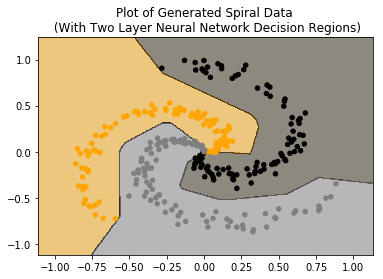

In [9]:
# Plot neural network decision boundaries on top of data

# Compute predictions for mesh_matrix inputs
nn_scores_mesh = np.dot(np.maximum(0, np.dot(mesh_matrix, nn_weights) + nn_bias), hidden_layer_weights) + hidden_layer_bias
nn_prediction_regions = np.argmax(nn_scores_mesh, axis=1).reshape(xx.shape)

# Plot data and two layer neural network classification regions
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', ['orange', 'black', 'grey'])
plt.contourf(xx, yy, nn_prediction_regions, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=cmap)
plt.title('Plot of Generated Spiral Data \n (With Two Layer Neural Network Decision Regions)')
plt.show()

In [10]:
# Evaluate training set accuracy of two layer neural network classifier

# Compute two layer neural network scores
nn_scores_trained = np.dot(np.maximum(0, np.dot(X, nn_weights) + nn_bias), hidden_layer_weights) + hidden_layer_bias

# Compute predictions by returning column with highest two layer neural network score for each row
nn_predictions = np.argmax(nn_scores_trained, axis=1)

# Compare nn_predictions to true labels contained in y
print('Training accuracy: %.2f' % np.mean(nn_predictions == y))

Training accuracy: 0.96
